# Introduction to Customer Segmentation using K-Means Clustering

## Project Overview
This Jupyter Notebook explores the use of K-means clustering, a popular unsupervised learning technique, to segment customers based on their annual income and spending scores. We utilize the 'Mall_Customers' dataset, which provides insights into the spending habits of customers at a mall.

## Objective
The main goal is to identify distinct groups (or clusters) of customers based on similarities in their income and spending patterns. This segmentation can help tailor marketing strategies to each group's unique characteristics and preferences.

## Methodology
1. **Data Loading and Exploration**: Load the dataset and perform preliminary data exploration to understand the features and distributions.
2. **Data Preprocessing**: Prepare the data for clustering, including selecting relevant features.
3. **Determining Optimal Clusters**: Use the Elbow Method to determine the optimal number of clusters for K-means clustering.
4. **Model Training**: Apply the K-means algorithm to segment customers into the optimal number of clusters.
5. **Visualization**: Visualize the clusters to interpret and understand the characteristics of each cluster.
6. **Model Evaluation and Interpretation**: Discuss the results and potential strategies for each customer segment.

## Tools and Libraries Used
- **Pandas** for data manipulation and ingestion.
- **NumPy** for numerical operations.
- **Matplotlib** and **Seaborn** for plotting and visualization.
- **Scikit-learn** for implementing the K-means clustering algorithm.




In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np  # Importing the NumPy library and assigning it the alias 'np' for numerical operations
import matplotlib.pyplot as plt  # Importing the plotting library Matplotlib's Pyplot module and assigning it the alias 'plt' for data visualization
import pandas as pd  # Importing the Pandas library and assigning it the alias 'pd' for data manipulation and analysis
from sklearn.cluster import KMeans  # Importing the KMeans class from the scikit-learn library for performing K-means clustering
import warnings  # Importing the warnings module to handle and suppress warnings
warnings.filterwarnings(action='ignore', category=UserWarning, message="KMeans is known to have a memory leak on Windows with MKL")
from matplotlib.colors import ListedColormap  # Importing ListedColormap

 Loading and exploring the dataset to understand its structure and contents.

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')  # Reading the CSV file 'Mall_Customers.csv' into a Pandas DataFrame named 'dataset'


In [4]:
dataset  # Displaying the DataFrame 'dataset' to inspect its content

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Columns:
1. **CustomerID**: Unique identifier for each customer.
2. **Genre**: Gender of the customer (Male/Female).
3. **Age**: Age of the customer.
4. **Annual Income (k$)**: Annual income of the customer in thousands of dollars.
5. **Spending Score (1-100)**: Score assigned by the mall based on customer spending behavior and purchasing data.

# Selecting specific columns (Annual Income and Spending Score) to be used for clustering.

In [5]:
X = dataset.iloc[:, [3, 4]].values  
# Extracting the values of the 4th and 5th columns from 'dataset' and storing them in the variable 'X'

In [6]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

K-means is a method to group similar data into K clusters. It starts by picking K random points (centroids), then assigns each data point to the nearest centroid. Next, it updates the centroids to be the average of the assigned points. This repeats until the groups don't change much.

The Elbow Method is a technique used in K-means clustering to determine the optimal number of clusters (K) for a dataset. Here's a detailed explanation:

The main goal of the Elbow Method is to find the number of clusters that best fit the data without overfitting. It helps in identifying the point where adding more clusters does not significantly improve the model.

WCSS stands for Within-Cluster Sum of Squares. It measures the total variance within each cluster in a K-means clustering algorithm. Lower WCSS indicates more compact and well-separated clusters.

Concept: Using the Elbow Method to find the optimal number of clusters by plotting WCSS against the number of clusters. The "elbow" point indicates the optimal number of clusters where the WCSS starts to decrease more slowly.

C:\Users\Suaiman Ureiga\AppData\Local\Temp\ipykernel_5136\3528322077.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(1, 11), wcss, 'bo-', markersize=10, linewidth=2, color='#1f77b4')  # Plot WCSS values with blue circles and a line


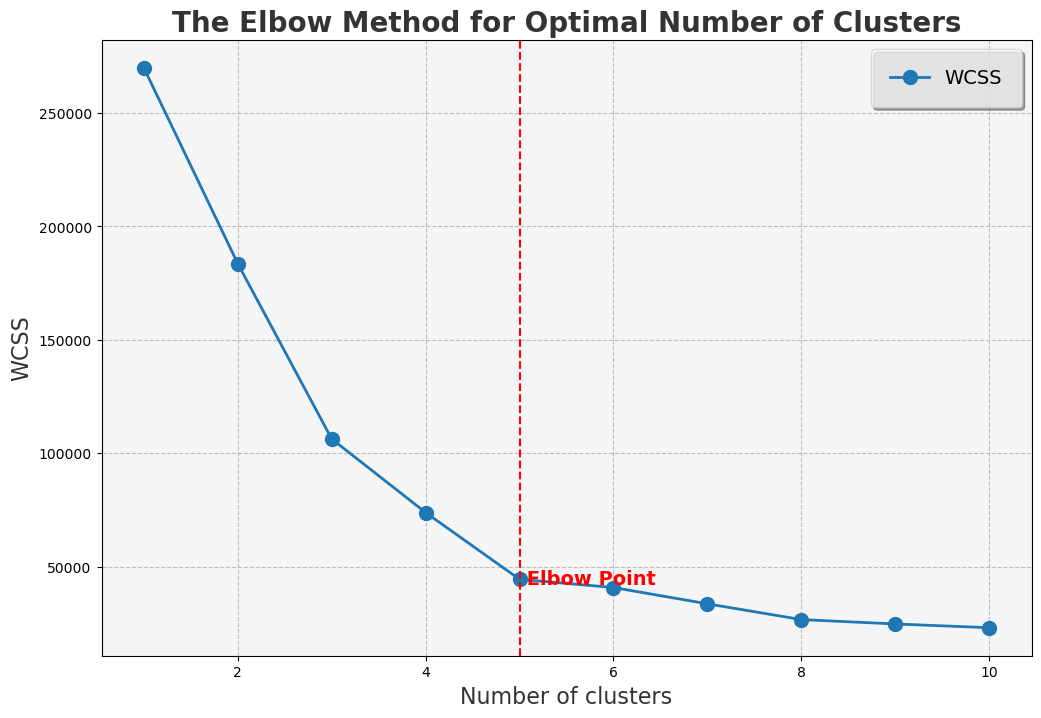

In [7]:
# Calculate WCSS for different numbers of clusters
wcss = []  # Initializing an empty list to store the within-cluster sum of squares (WCSS) for different numbers of clusters
for i in range(1, 11):  # Iterating over the range of cluster numbers from 1 to 11
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)  # Creating a KMeans instance with 'i' clusters, using the 'k-means++' initialization method and a fixed random state for reproducibility
    kmeans.fit(X)  # Fitting the KMeans model to the data 'X'
    wcss.append(kmeans.inertia_)  # Appending the WCSS (inertia) of the fitted model to the list 'wcss'

# Enhanced Visualization for Elbow Method
plt.figure(figsize=(12, 8))  # Set the figure size for the plot

# Plotting the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss, 'bo-', markersize=10, linewidth=2, color='#1f77b4')  # Plot WCSS values with blue circles and a line

# Adding titles and labels with improved font sizes and styles
plt.title('The Elbow Method for Optimal Number of Clusters', fontsize=20, fontweight='bold', color='#333333')  # Set title with custom font size and style
plt.xlabel('Number of clusters', fontsize=16, color='#333333')  # Set x-axis label with custom font size and style
plt.ylabel('WCSS', fontsize=16, color='#333333')  # Set y-axis label with custom font size and style

# Adding a grid with custom styling
plt.grid(True, linestyle='--', alpha=0.6, color='#999999')  # Add grid with dashed lines and light gray color

# Adding a legend
plt.legend(['WCSS'], fontsize=14, loc='best', fancybox=True, framealpha=0.7, shadow=True, borderpad=1)  # Add a legend with custom styling

# Highlighting the elbow point
elbow_point = 5  # Define the elbow point
plt.axvline(x=elbow_point, linestyle='--', color='red', linewidth=1.5)  # Add a vertical line at the elbow point
plt.text(elbow_point, wcss[elbow_point-1], ' Elbow Point', color='red', fontsize=14, verticalalignment='center', fontweight='bold')  # Annotate the elbow point

# Adding a background style
plt.gca().set_facecolor('#f5f5f5')  # Set the background color of the plot

# Display the plot
plt.show()  # Show the plot


# The graph displayed is a plot of the "Elbow Method" used to determine the optimal number of clusters in K-means clustering.


- **x-axis (Number of clusters)**: Represents the number of clusters (from 1 to 10) tested in the K-means algorithm.
- **y-axis (WCSS)**: Represents the Within-Cluster Sum of Squares (WCSS), a measure of the total variance within each cluster.

The plot shows a steep decrease in WCSS as the number of clusters increases, indicating that adding more clusters helps to better fit the data and reduce the variance within clusters. However, after a certain point (around 3 or 4 clusters), the rate of decrease slows down, forming an "elbow" shape. The "elbow" point is considered the optimal number of clusters, where adding more clusters beyond this point results in only marginal improvements in WCSS. This helps to balance between underfitting and overfitting.

In [8]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)  
# Initializing the KMeans algorithm with 5 clusters, using the 'k-means++' method for centroid initialization, and 
#setting a fixed random state for reproducibility
y_kmeans = kmeans.fit_predict(X)  
# Fitting the KMeans model to the data 'X' and predicting the cluster indices for each data point, 
#storing the results in 'y_kmeans'


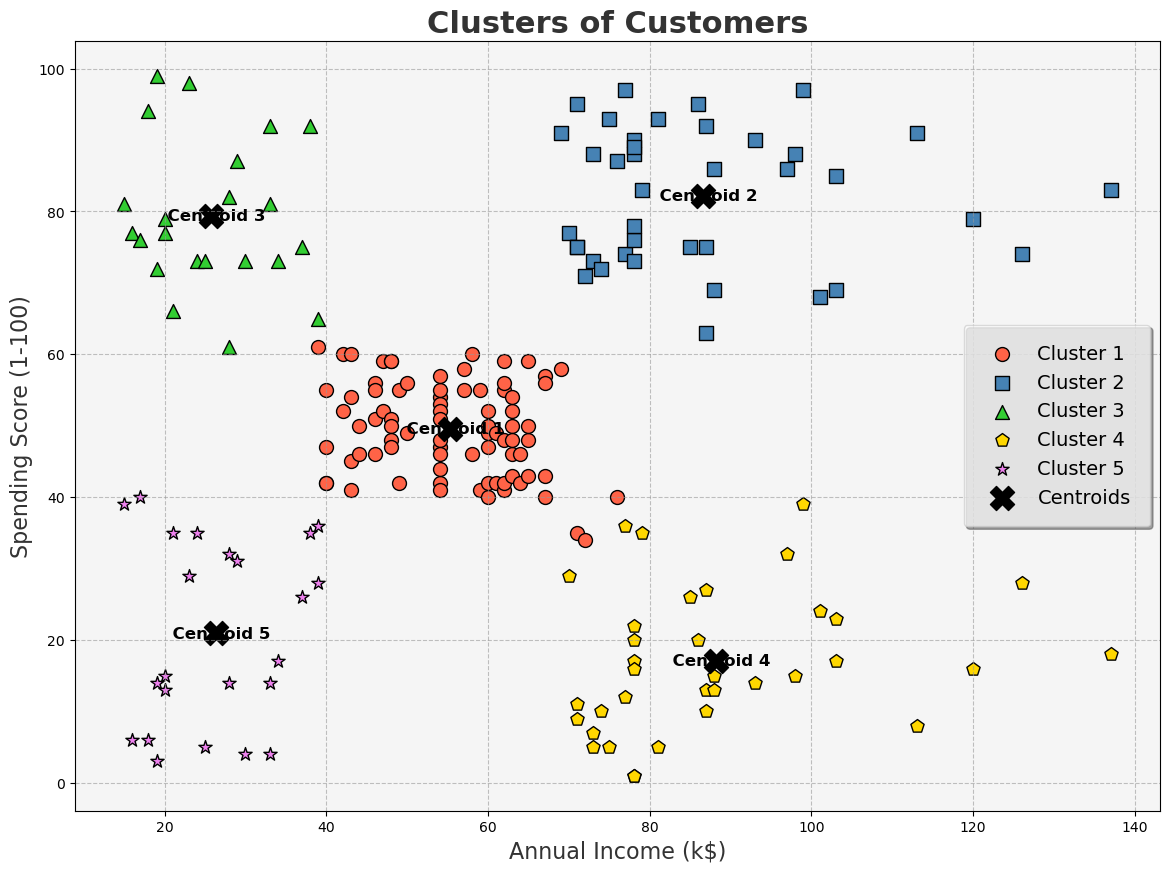

In [9]:
# Enhanced Visualization
plt.figure(figsize=(14, 10))  # Set the figure size for the plot

# Define a custom colormap
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#EE82EE']  # Custom colors for each cluster
cmap = ListedColormap(colors)  # Create a colormap from the custom colors

# Plotting each cluster with a different color and marker
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, color=colors[0], marker='o', edgecolor='black', label='Cluster 1')  # Plot Cluster 1
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, color=colors[1], marker='s', edgecolor='black', label='Cluster 2')  # Plot Cluster 2
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, color=colors[2], marker='^', edgecolor='black', label='Cluster 3')  # Plot Cluster 3
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, color=colors[3], marker='p', edgecolor='black', label='Cluster 4')  # Plot Cluster 4
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, color=colors[4], marker='*', edgecolor='black', label='Cluster 5')  # Plot Cluster 5

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X', edgecolor='black', label='Centroids')  # Plot centroids

# Adding titles and labels with improved font sizes and styles
plt.title('Clusters of Customers', fontsize=22, fontweight='bold', color='#333333')  # Set the title with custom font size and style
plt.xlabel('Annual Income (k$)', fontsize=16, color='#333333')  # Set x-axis label with custom font size and style
plt.ylabel('Spending Score (1-100)', fontsize=16, color='#333333')  # Set y-axis label with custom font size and style

# Adding a grid with custom styling
plt.grid(True, linestyle='--', alpha=0.6, color='#999999')  # Add a grid with dashed lines and light gray color

# Adding a legend with an improved font size
plt.legend(fontsize=14, loc='best', fancybox=True, framealpha=0.7, shadow=True, borderpad=1)  # Add a legend with custom styling

# Adding annotations to highlight centroids
for i, (x, y) in enumerate(kmeans.cluster_centers_):  # Iterate over centroids
    plt.text(x, y, f'  Centroid {i+1}', color='black', fontsize=12, fontweight='bold', ha='center', va='center')  # Annotate each centroid

# Adding a background style
plt.gca().set_facecolor('#f5f5f5')  # Set the background color of the plot

# Display the plot
plt.show()  # Show the plot


In [10]:
import joblib

# Save the model
joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']

In [11]:
# Load the model
kmeans_loaded = joblib.load('kmeans_model.pkl')

# You can now use kmeans_loaded for predictions or other tasks


In [12]:
import matplotlib.pyplot as plt  # Importing the matplotlib library for plotting
from sklearn.datasets import make_blobs  # Importing make_blobs to create synthetic data
from sklearn.cluster import KMeans  # Importing KMeans for clustering

# Step 1: Create Synthetic Data
X_synthetic, _ = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=0)  
# Creating synthetic data with 300 samples, 5 centers, and a standard deviation of 0.60

# Step 3: Predict the Clusters
y_synthetic_kmeans = kmeans_loaded.predict(X_synthetic)  
# Predicting the clusters for the synthetic data using the loaded KMeans model

# Step 4: Visualize the Clusters
plt.figure(figsize=(14, 10))  # Set the figure size for the plot

# Define a custom colormap
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#EE82EE']  # Custom colors for each cluster

# Plotting each cluster with a different color and marker
plt.scatter(X_synthetic[y_synthetic_kmeans == 0, 0], X_synthetic[y_synthetic_kmeans == 0, 1], s=100, color=colors[0], marker='o', edgecolor='black', label='Cluster 1')
plt.scatter(X_synthetic[y_synthetic_kmeans == 1, 0], X_synthetic[y_synthetic


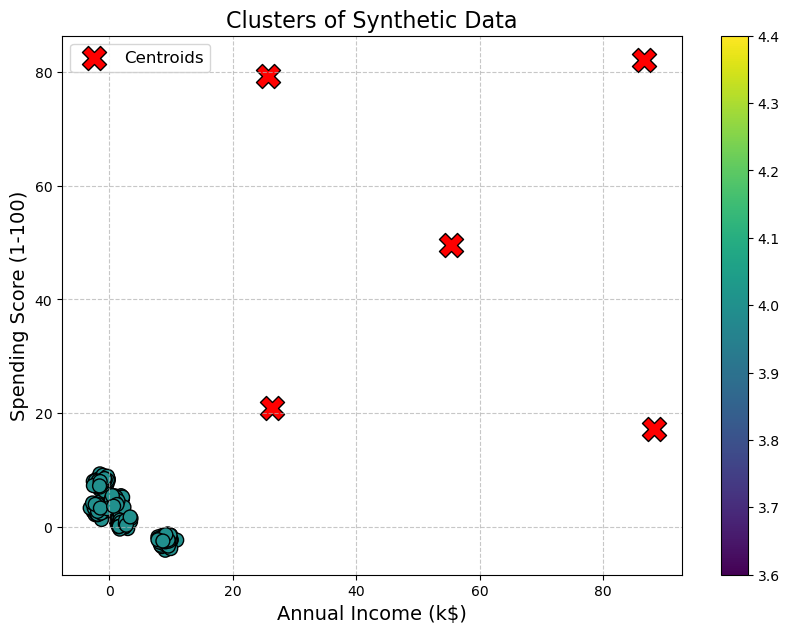

In [15]:
plt.figure(figsize=(10, 7))  # Set the figure size for the plot

# Plot the synthetic data points with cluster assignments
scatter = plt.scatter(X_synthetic[:, 0], X_synthetic[:, 1], c=y_synthetic_kmeans, s=100, cmap='viridis', marker='o', edgecolor='k')  # Scatter plot with colors based on cluster assignments

# Plot the centroids of the clusters
centroids = plt.scatter(kmeans_loaded.cluster_centers_[:, 0], kmeans_loaded.cluster_centers_[:, 1], s=300, c='red', marker='X', edgecolor='k', label='Centroids')  # Centroid markers

# Set the title and axis labels
plt.title('Clusters of Synthetic Data', fontsize=16)  # Title of the plot
plt.xlabel('Annual Income (k$)', fontsize=14)  # X-axis label
plt.ylabel('Spending Score (1-100)', fontsize=14)  # Y-axis label

# Add a legend
plt.legend(fontsize=12)  # Legend with custom font size

# Add a grid
plt.grid(True, linestyle='--', alpha=0.7)  # Grid with dashed lines and slight transparency

# Add a color bar
plt.colorbar(scatter)  # Color bar for the scatter plot

# Display the plot
plt.show()  # Show the plot


# hierarchical_clustering


### Summary of the Dendrogram:

The dendrogram is a visual representation of the hierarchical clustering of a dataset. It shows how clusters are formed by progressively merging individual data points into larger clusters based on their Euclidean distances. 

- **Vertical Axis (Euclidean Distances)**: Represents the distance or dissimilarity between clusters.
- **Horizontal Axis (Customers)**: Represents the individual data points (or customers).
- **Colored Lines**: Different colors represent different clusters.
- **Red Dashed Line (Threshold)**: The horizontal red dashed line at y=150 indicates the threshold for cutting the dendrogram to form clusters. Clusters are formed by cutting the dendrogram at this level.

The dendrogram helps determine the optimal number of clusters by visually inspecting the largest vertical distances that do not cross the threshold line.


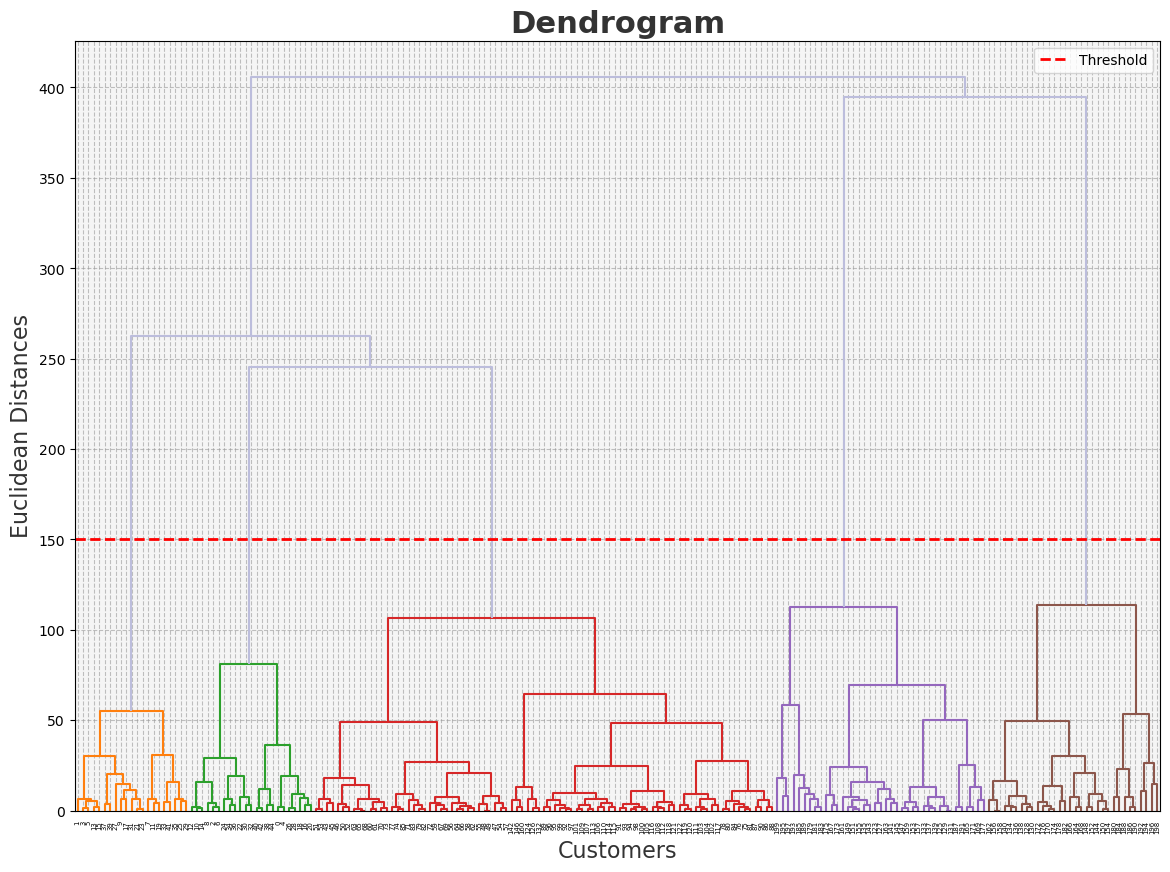

In [16]:
import matplotlib.pyplot as plt  # Importing the matplotlib library for plotting
import scipy.cluster.hierarchy as sch  # Importing the hierarchical clustering module from scipy


# Create the dendrogram
plt.figure(figsize=(14, 10))  # Set the figure size for the plot

# Calculate the linkage
linkage = sch.linkage(X, method='ward')  # Compute the linkage matrix using Ward's method

# Plot the dendrogram
dendrogram = sch.dendrogram(linkage, 
                            color_threshold=0.5 * max(linkage[:, 2]), 
                            above_threshold_color='#bcbddc')  # Create the dendrogram with custom color settings

# Enhancing the dendrogram
plt.title('Dendrogram', fontsize=22, fontweight='bold', color='#333333')  # Set the title with custom font size and style
plt.xlabel('Customers', fontsize=16, color='#333333')  # Set x-axis label with custom font size and style
plt.ylabel('Euclidean Distances', fontsize=16, color='#333333')  # Set y-axis label with custom font size and style

# Adding a threshold line
plt.axhline(y=150, color='red', linestyle='--', linewidth=2, label='Threshold')  # Add a horizontal line to indicate the threshold for cutting the dendrogram
plt.legend()  # Add a legend to the plot

# Adding a grid with custom styling
plt.grid(True, linestyle='--', alpha=0.6, color='#999999')  # Add a grid with dashed lines and light gray color

# Adding a background style
plt.gca().set_facecolor('#f5f5f5')  # Set the background color of the plot

# Display the plot
plt.show()  # Show the plot



### Interpreting the Dendrogram:
- **Clusters Formation**:
  - To determine the number of clusters, you can cut the dendrogram at a specific height. For example, cutting at the height of the red dashed line (y=150) will result in clusters formed by the vertical lines intersected by the red line.
  
- **Optimal Number of Clusters**:
  - The largest vertical distances in the dendrogram that do not cross the threshold line suggest the best places to cut the dendrogram. These gaps indicate significant differences between clusters.

- **Example**:
  - In this dendrogram, cutting at y=150, you can visually inspect that there are several clusters (indicated by different colors). The exact number of clusters can be counted by observing how many vertical lines intersect the red dashed line without being merged above it.

### Practical Use:
- **Hierarchical Clustering**:
  - Hierarchical clustering is useful for exploring the dataset to understand the natural grouping of data points without pre-specifying the number of clusters.
  
- **Decision Making**:
  - The dendrogram provides a visual aid to decide on the number of clusters by showing how the data points or clusters merge at different levels of dissimilarity.

The dendrogram, therefore, provides both a visual and quantitative way to assess and understand the clustering structure in the data.

In [38]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)


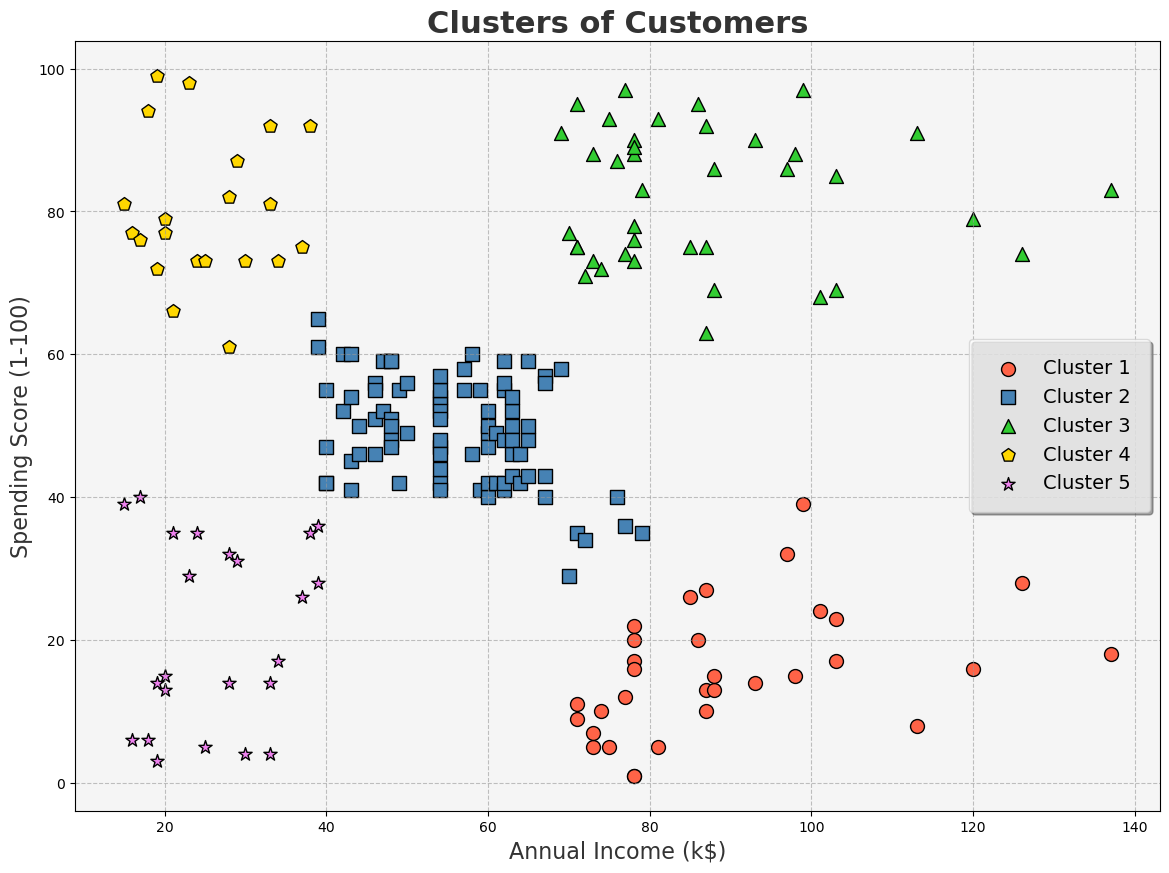

In [39]:
# Enhanced Visualization of Clusters
plt.figure(figsize=(14, 10))

# Define colors for clusters
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#EE82EE']

# Plot each cluster with a different color and marker
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, color=colors[0], marker='o', edgecolor='black', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, color=colors[1], marker='s', edgecolor='black', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, color=colors[2], marker='^', edgecolor='black', label='Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, color=colors[3], marker='p', edgecolor='black', label='Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, color=colors[4], marker='*', edgecolor='black', label='Cluster 5')

# Adding titles and labels with improved font sizes and styles
plt.title('Clusters of Customers', fontsize=22, fontweight='bold', color='#333333')
plt.xlabel('Annual Income (k$)', fontsize=16, color='#333333')
plt.ylabel('Spending Score (1-100)', fontsize=16, color='#333333')

# Adding a grid with custom styling
plt.grid(True, linestyle='--', alpha=0.6, color='#999999')

# Adding a legend with an improved font size
plt.legend(fontsize=14, loc='best', fancybox=True, framealpha=0.7, shadow=True, borderpad=1)

# Adding a background style
plt.gca().set_facecolor('#f5f5f5')

# Display the plot
plt.show()

In [40]:
import joblib

# Save the model
joblib.dump(hc, 'hc.pkl')


['hc.pkl']

In [41]:
# Load the model
kmeans_loaded = joblib.load('hc.pkl')

# You can now use kmeans_loaded for predictions or other tasks

#  Tools and Libraries Used
- **Matplotlib** and **Seaborn** for plotting and visualization. (https://www.w3schools.com/python/matplotlib_intro.asp, https://www.w3schools.com/python/numpy/numpy_random_seaborn.asp
- **Scikit-learn** for implementing the K-means clustering algorithm. (https://devdocs.io/scikit_learn/)